# -----------------------------------deprecated--------------------------------

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone
 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals of the Case Study

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Importing modules and supressing warnings!

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# suppress error
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [3]:
#importing dataset 
my_leads=pd.read_csv("data/Leads.csv")

# Understanding the data

In [4]:
my_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking total rows and cols in dataset
my_leads.shape

(9240, 37)

In [6]:
#exploring the columns
my_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Data statistics information summary 
my_leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [8]:
#data info to check for variables and null values
my_leads.info() # Some columns are having null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Changing 'select' values to null

In [9]:
my_leads = my_leads.replace("Select", np.nan)

# EXPLORATORY DATA ANALYSIS

In [10]:
# lets Check the number of missing values in each column
my_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# checking the null value in terms of percentage to inorder to make decisions for eliminations
round(100*(my_leads.isnull().sum()/len(my_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Eliminating the columns with more than 36% of null values as they don't help in analysis
col=my_leads.columns
for col in my_leads.columns:
    if((100*(my_leads[col].isnull().sum()/len(my_leads.index))) >= 36):
        my_leads.drop(col, 1, inplace=True)

In [13]:
#Lets check the % of Null again 
round(100*(my_leads.isnull().sum()/len(my_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
#checking column Country as Country as out of 9240 there are 6779 non-null values
my_leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
# There are 6779 non-null values out of which 6492 is of India, hence dropping the Column country
my_leads.drop(['Country'], axis = 1, inplace = True)

In [16]:
# lets check the % Null again 
round(100*(my_leads.isnull().sum()/len(my_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
# Now lets check the Column What matters most to you in choosing a course which also  has 29.32% null values
my_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
# Dropping the coulumn What matters most to you in choosing a course as it has no values for analysis
my_leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [19]:
# Similarly lets check the Column What is your current occupation which has 29.11% null values
my_leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# Dropping the column as apart from 29.11% more than 90% are unemployed.
my_leads.drop(['What is your current occupation'], axis = 1, inplace = True)

In [21]:
# lets check the % Null again 
round(100*(my_leads.isnull().sum()/len(my_leads.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [22]:
#Now lets see TotalVisits 1.67% of null values
my_leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [23]:
#Dropping the null values from TotalVisits
my_leads = my_leads[~pd.isnull(my_leads['TotalVisits'])]

In [24]:
#Lets check Page Views Per Visit which also  has 1.67% null values
 
my_leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [25]:
#Dropping the null values from Page Views Per Visit 
my_leads = my_leads[~pd.isnull(my_leads['Page Views Per Visit'])]

In [26]:
#similarly lets check Last Activity which has  1.32%
my_leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
#Dropping the null values from Last Activity
my_leads = my_leads[~pd.isnull(my_leads['Last Activity'])]

In [28]:
#Lastly lets check Lead Source with 0.38% null values
my_leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [29]:
#Dropping the null values from Lead Source
my_leads = my_leads[~pd.isnull(my_leads['Lead Source'])]

In [30]:
# lets check the % Null again 
round(100*(my_leads.isnull().sum()/len(my_leads.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [31]:
# checking Prospect ID 
my_leads['Prospect ID'].value_counts()

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64

In [32]:
#check for duplicates
sum(my_leads.duplicated(subset = 'Prospect ID')) == 0

True

In [33]:
#Dropping Prospect ID colums as it has unique attributes, not needed for analysis
my_leads.drop(['Prospect ID'], axis = 1, inplace = True)

In [34]:
# checking Lead Number 
my_leads['Lead Number'].value_counts()

660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: Lead Number, Length: 9074, dtype: int64

In [35]:
#check for duplicates
sum(my_leads.duplicated(subset = 'Lead Number')) == 0

True

In [36]:
#Dropping colums as it has unique attributes, not needed for analysis
my_leads.drop(['Lead Number'], axis = 1, inplace = True)

In [37]:
# lets check the % Null again 
round(100*(my_leads.isnull().sum()/len(my_leads.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview  

In [38]:
# checking counts for Do Not Email 
my_leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

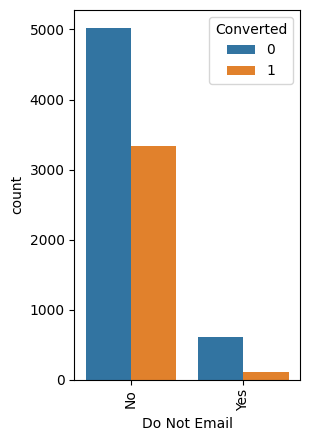

In [39]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Do Not Email'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [40]:
# checking counts for Do Not Email 
my_leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

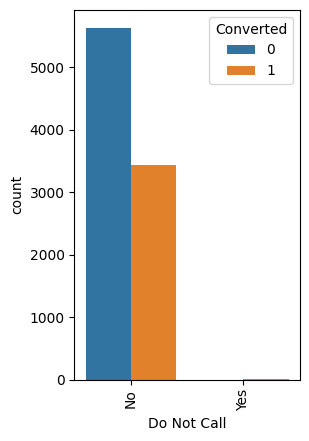

In [41]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Do Not Call'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [42]:
# checking counts for Search 
my_leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

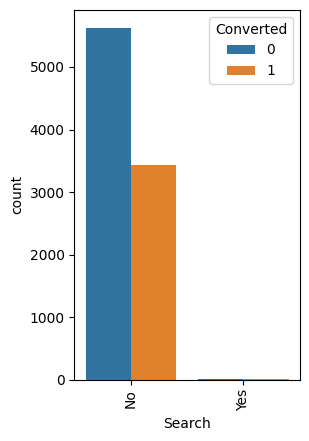

In [43]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Search'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [44]:
# checking counts for Magazine 
my_leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

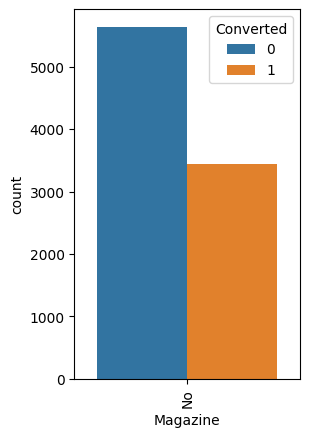

In [45]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Magazine'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [46]:
# checking counts for Newspaper Article  
my_leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

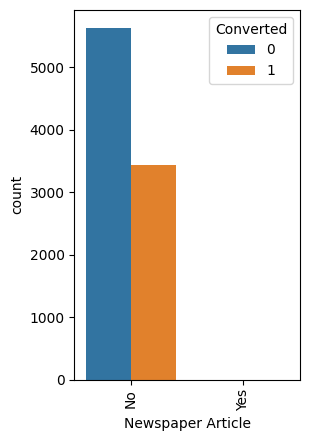

In [47]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Newspaper Article'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [48]:
# checking counts for X Education Forums
my_leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

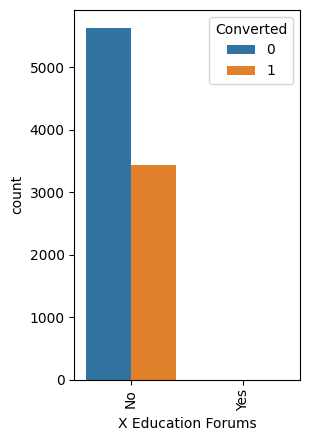

In [49]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['X Education Forums'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [50]:
# checking counts for Newspaper
my_leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

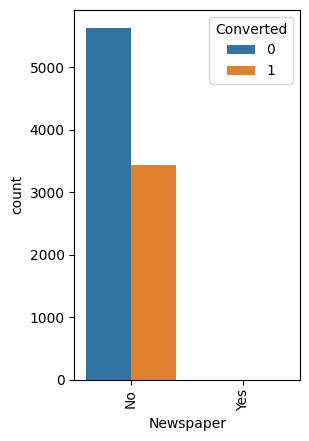

In [51]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Newspaper'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [52]:
# checking counts for Digital Advertisement
my_leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

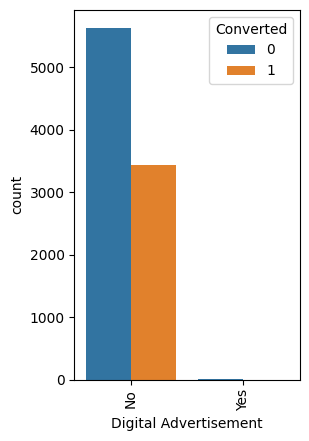

In [53]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Digital Advertisement'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [54]:
# checking counts for Through Recommendations
my_leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

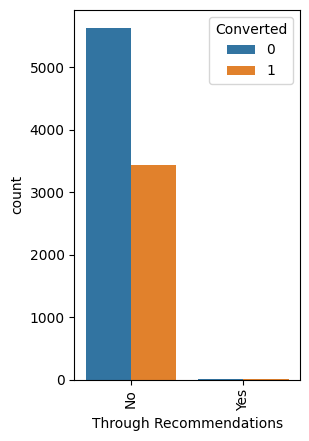

In [55]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Through Recommendations'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [56]:
# checking counts for Receive More Updates About Our Courses 
my_leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

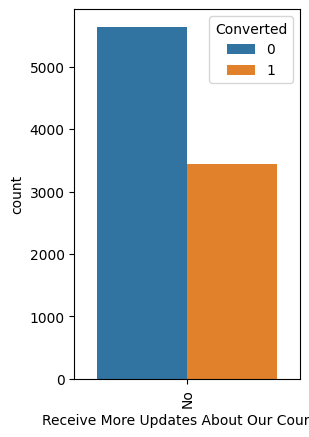

In [57]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x= my_leads['Receive More Updates About Our Courses'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [58]:
# checking counts for Update me on Supply Chain Content 
my_leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [59]:
# checking counts forGet updates on DM Content 
my_leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

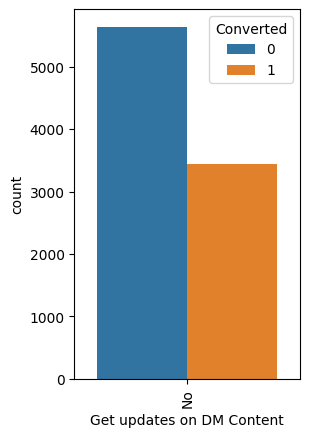

In [60]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['Get updates on DM Content'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [61]:
# checking counts for I agree to pay the amount through cheque
my_leads['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

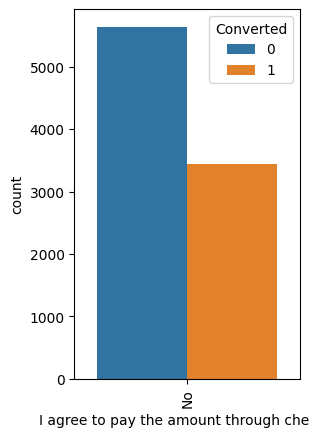

In [62]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = my_leads['I agree to pay the amount through cheque'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [63]:
# checking counts for A free copy of Mastering The Interview 
my_leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

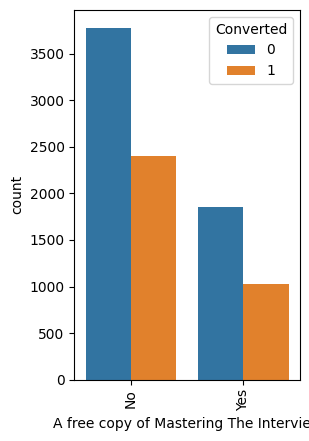

In [64]:
#visualizing count of Variable based on Converted value
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x= my_leads['A free copy of Mastering The Interview'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [65]:
# checking counts for Last Notable Activity 
my_leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

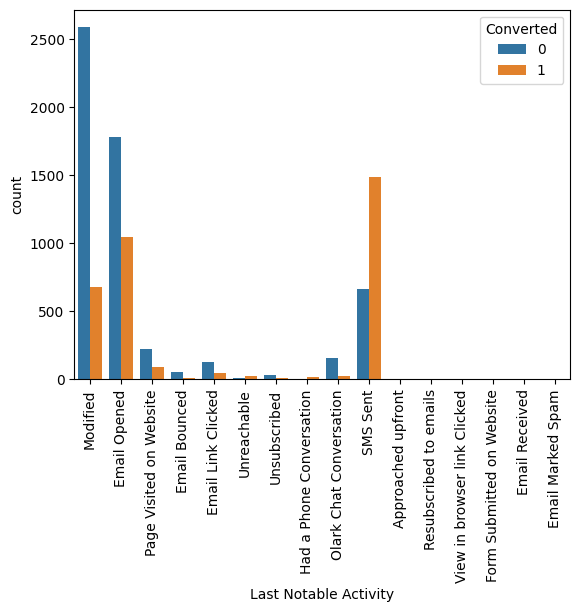

In [66]:
#visualizing count of Variable based on Converted value
ax2=sns.countplot(x = my_leads['Last Notable Activity'], hue=my_leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [67]:
#Removing the coulumns with  majorly present as No for all the data points. These include Do not email, Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque.
my_leads.drop(['Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [68]:
# lets check the % Null again 
round(100*(my_leads.isnull().sum()/len(my_leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

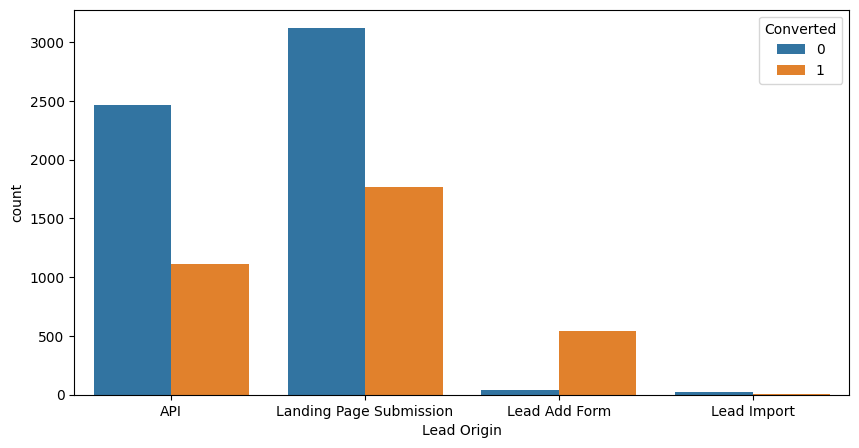

In [69]:
#Lead Origin
#visualizing spread of variable

plt.figure(figsize=(10,5))
s1=sns.countplot(x=my_leads['Lead Origin'], hue=my_leads.Converted)
plt.show() # landing page submission created high number of leads 

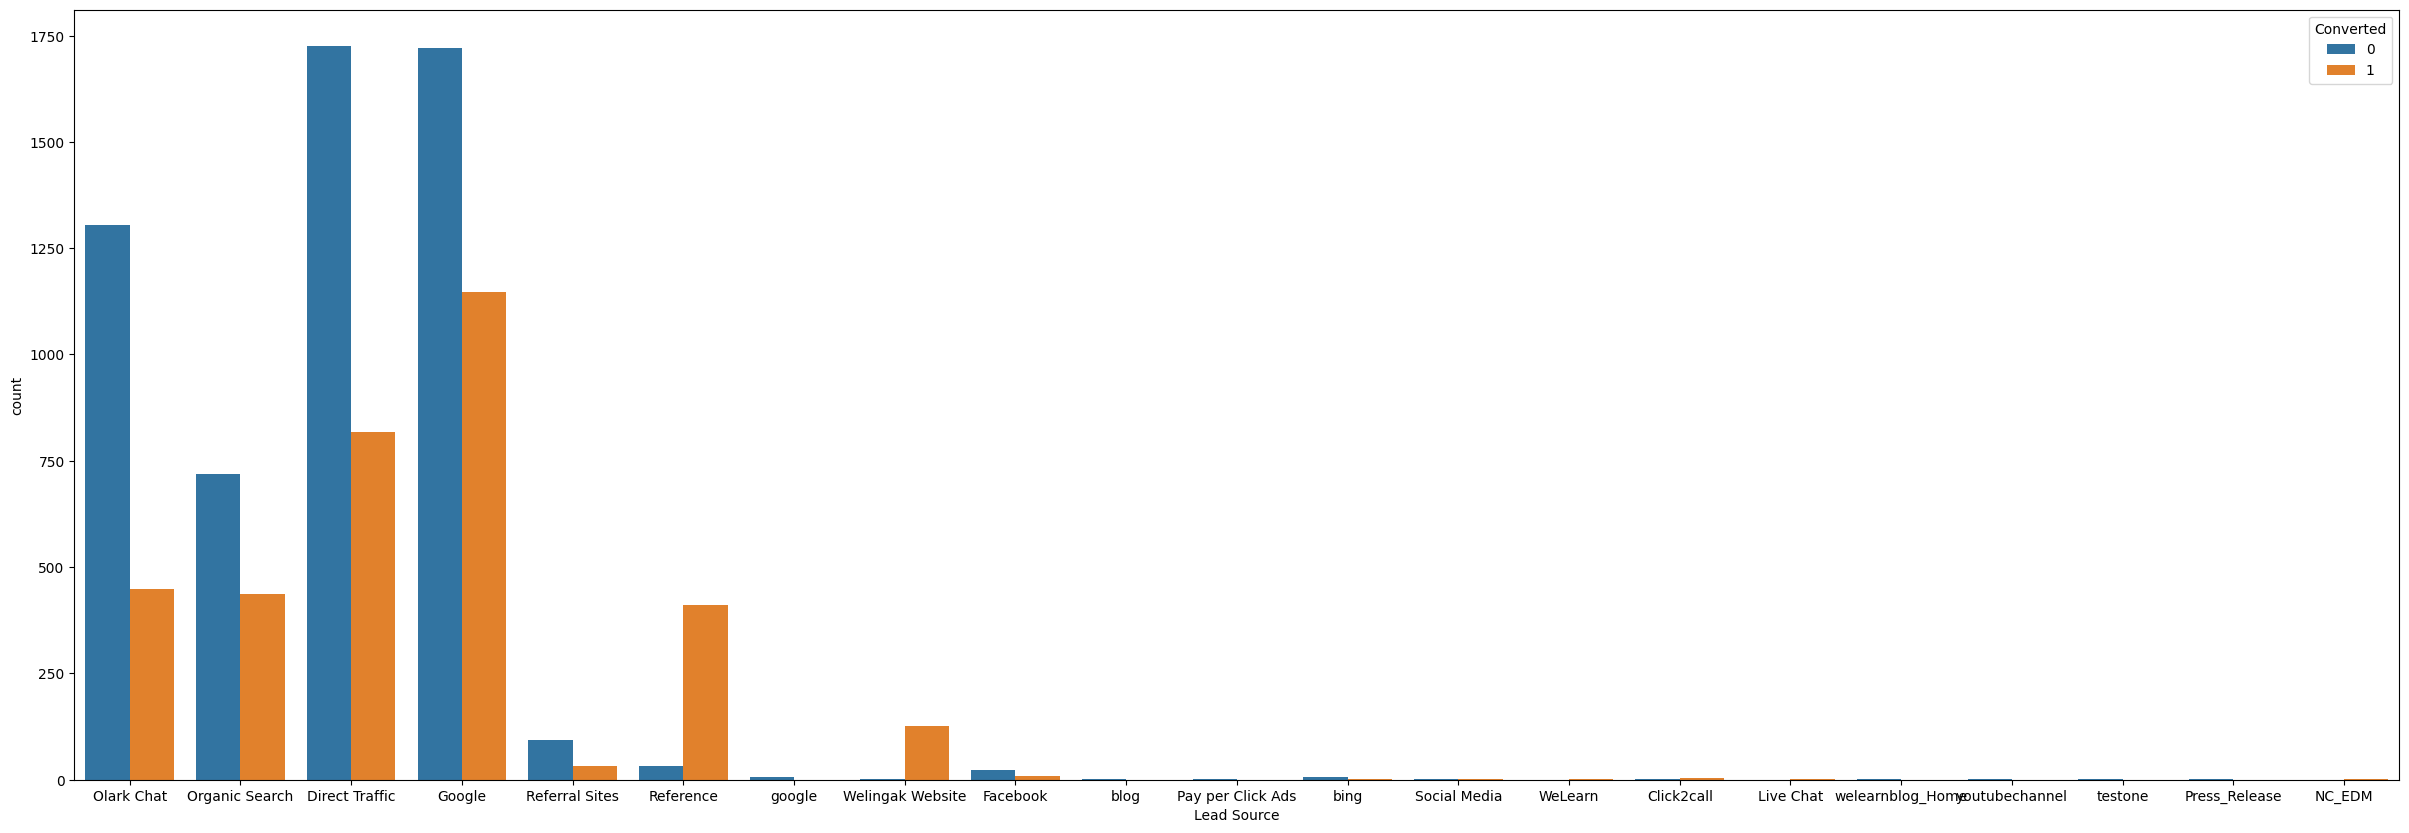

In [70]:
#Lead Source  
#visualizing spread of variable
plt.figure(figsize=(30,10))
s1=sns.countplot(x=my_leads['Lead Source'], hue=my_leads.Converted)
plt.show() # google traffic lead scores the highest 

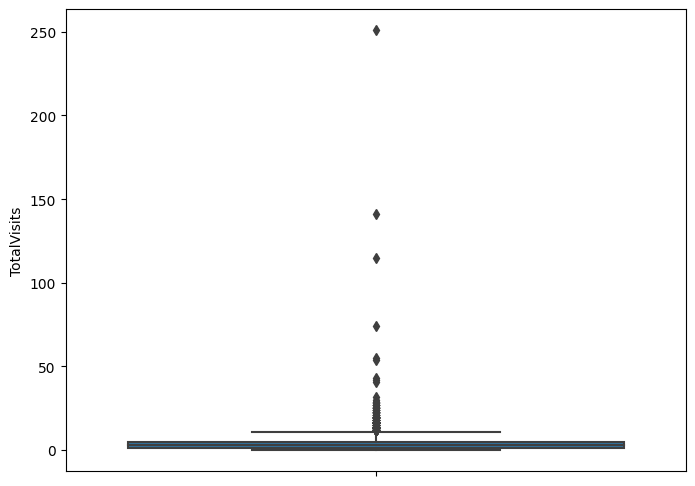

In [71]:
#Total Visits
#visualizing spread of variable
plt.figure(figsize=(8,6))
sns.boxplot(y=my_leads['TotalVisits'])
plt.show()# There are outliers

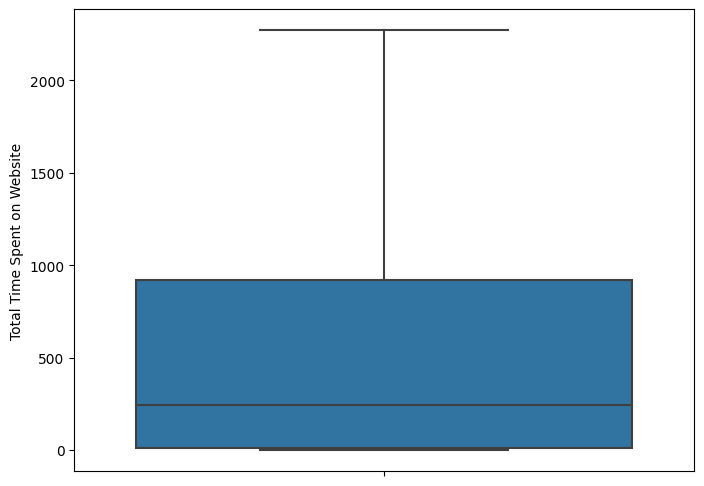

In [72]:
#Total Time Spent on Website 
plt.figure(figsize=(8,6))
sns.boxplot(y=my_leads['Total Time Spent on Website'])
plt.show()#count 7643 with 533.502944

In [73]:
my_leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [74]:
print(len(my_leads.index))
print(len(my_leads.index)/9240)

9074
0.982034632034632


In [75]:
my_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


# Lets Visualize and Prepare the data

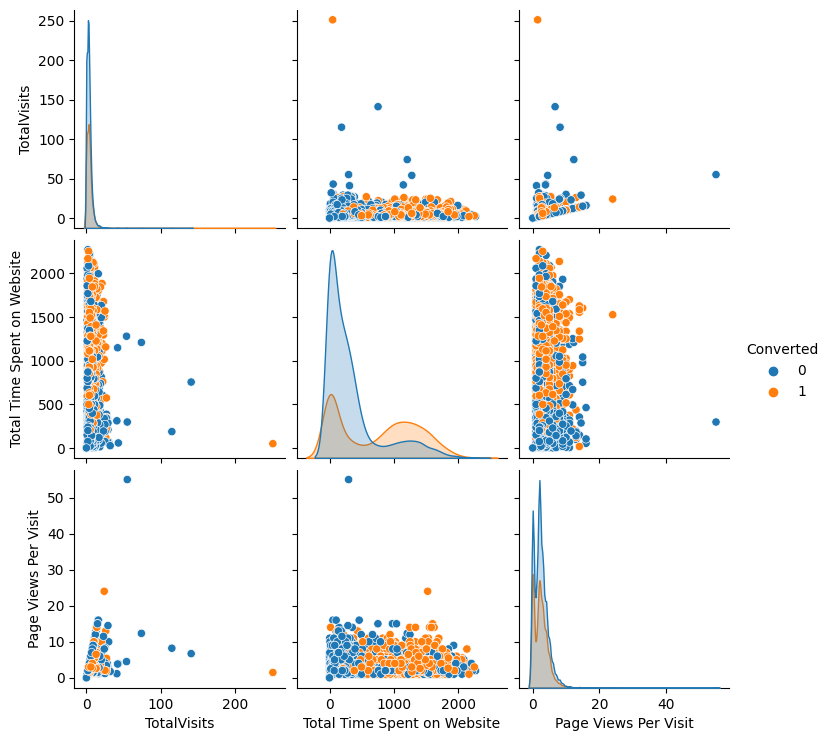

In [76]:
# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(my_leads,diag_kind='kde',hue='Converted')
plt.show()

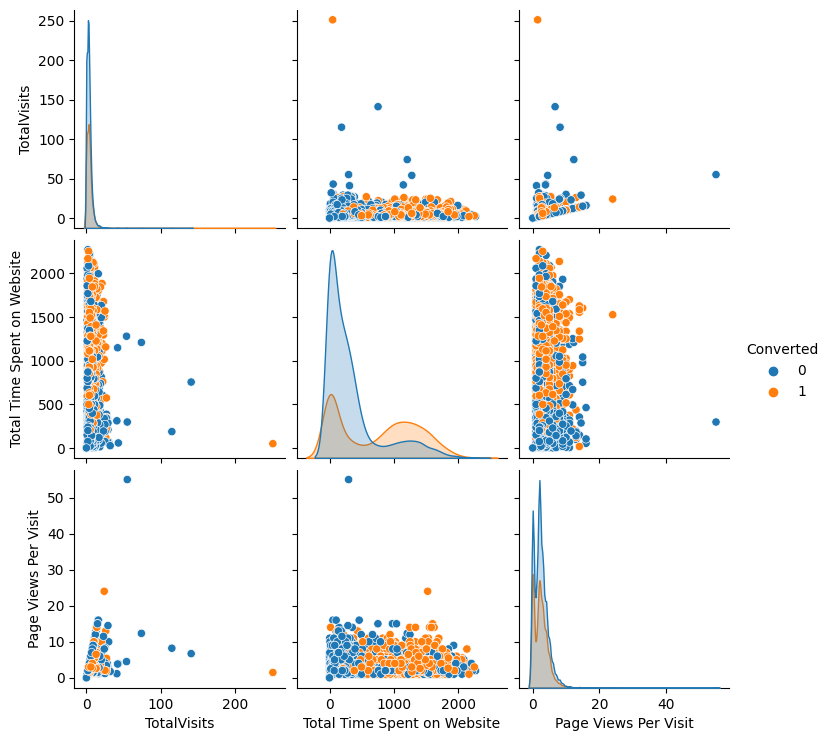

In [77]:
x_lead = my_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_lead,diag_kind='kde',hue='Converted')
plt.show()

In [78]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_lead = pd.DataFrame(pt.fit_transform(x_lead))
transformedx_lead.columns = x_lead.columns
transformedx_lead.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.463971,-1.470706,-1.460532,-0.780481
1,0.744325,0.737618,0.303661,-0.780481
2,-0.147225,1.312200,0.060166,1.281261
3,-0.646554,0.273739,-0.543170,-0.780481
4,-0.147225,1.258818,-0.543170,1.281261


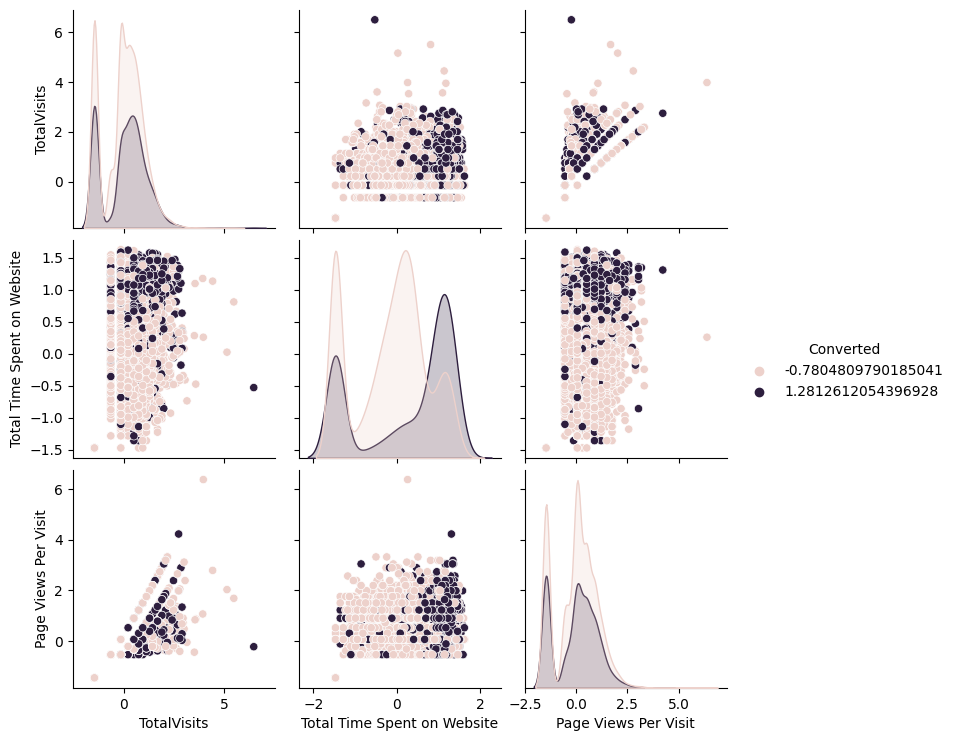

In [79]:
sns.pairplot(transformedx_lead,diag_kind='kde',hue='Converted')
plt.show()

# Dummy variable creation
Lets look at which variables are actually categorical variables.

In [80]:
# Check the columns which are of type 'object'

temp = my_leads.loc[:, my_leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [81]:
# Create dummy variables using the 'get_dummies' command
my_dummy = pd.get_dummies(my_leads[['Lead Origin', 'Lead Source', 'Last Activity', 
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
master_leads = pd.concat([my_leads, my_dummy], axis=1)

In [82]:
# Drop the variables for which the dummy variables have been created
master_leads = master_leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [83]:
# Let glance at the dataset again
master_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


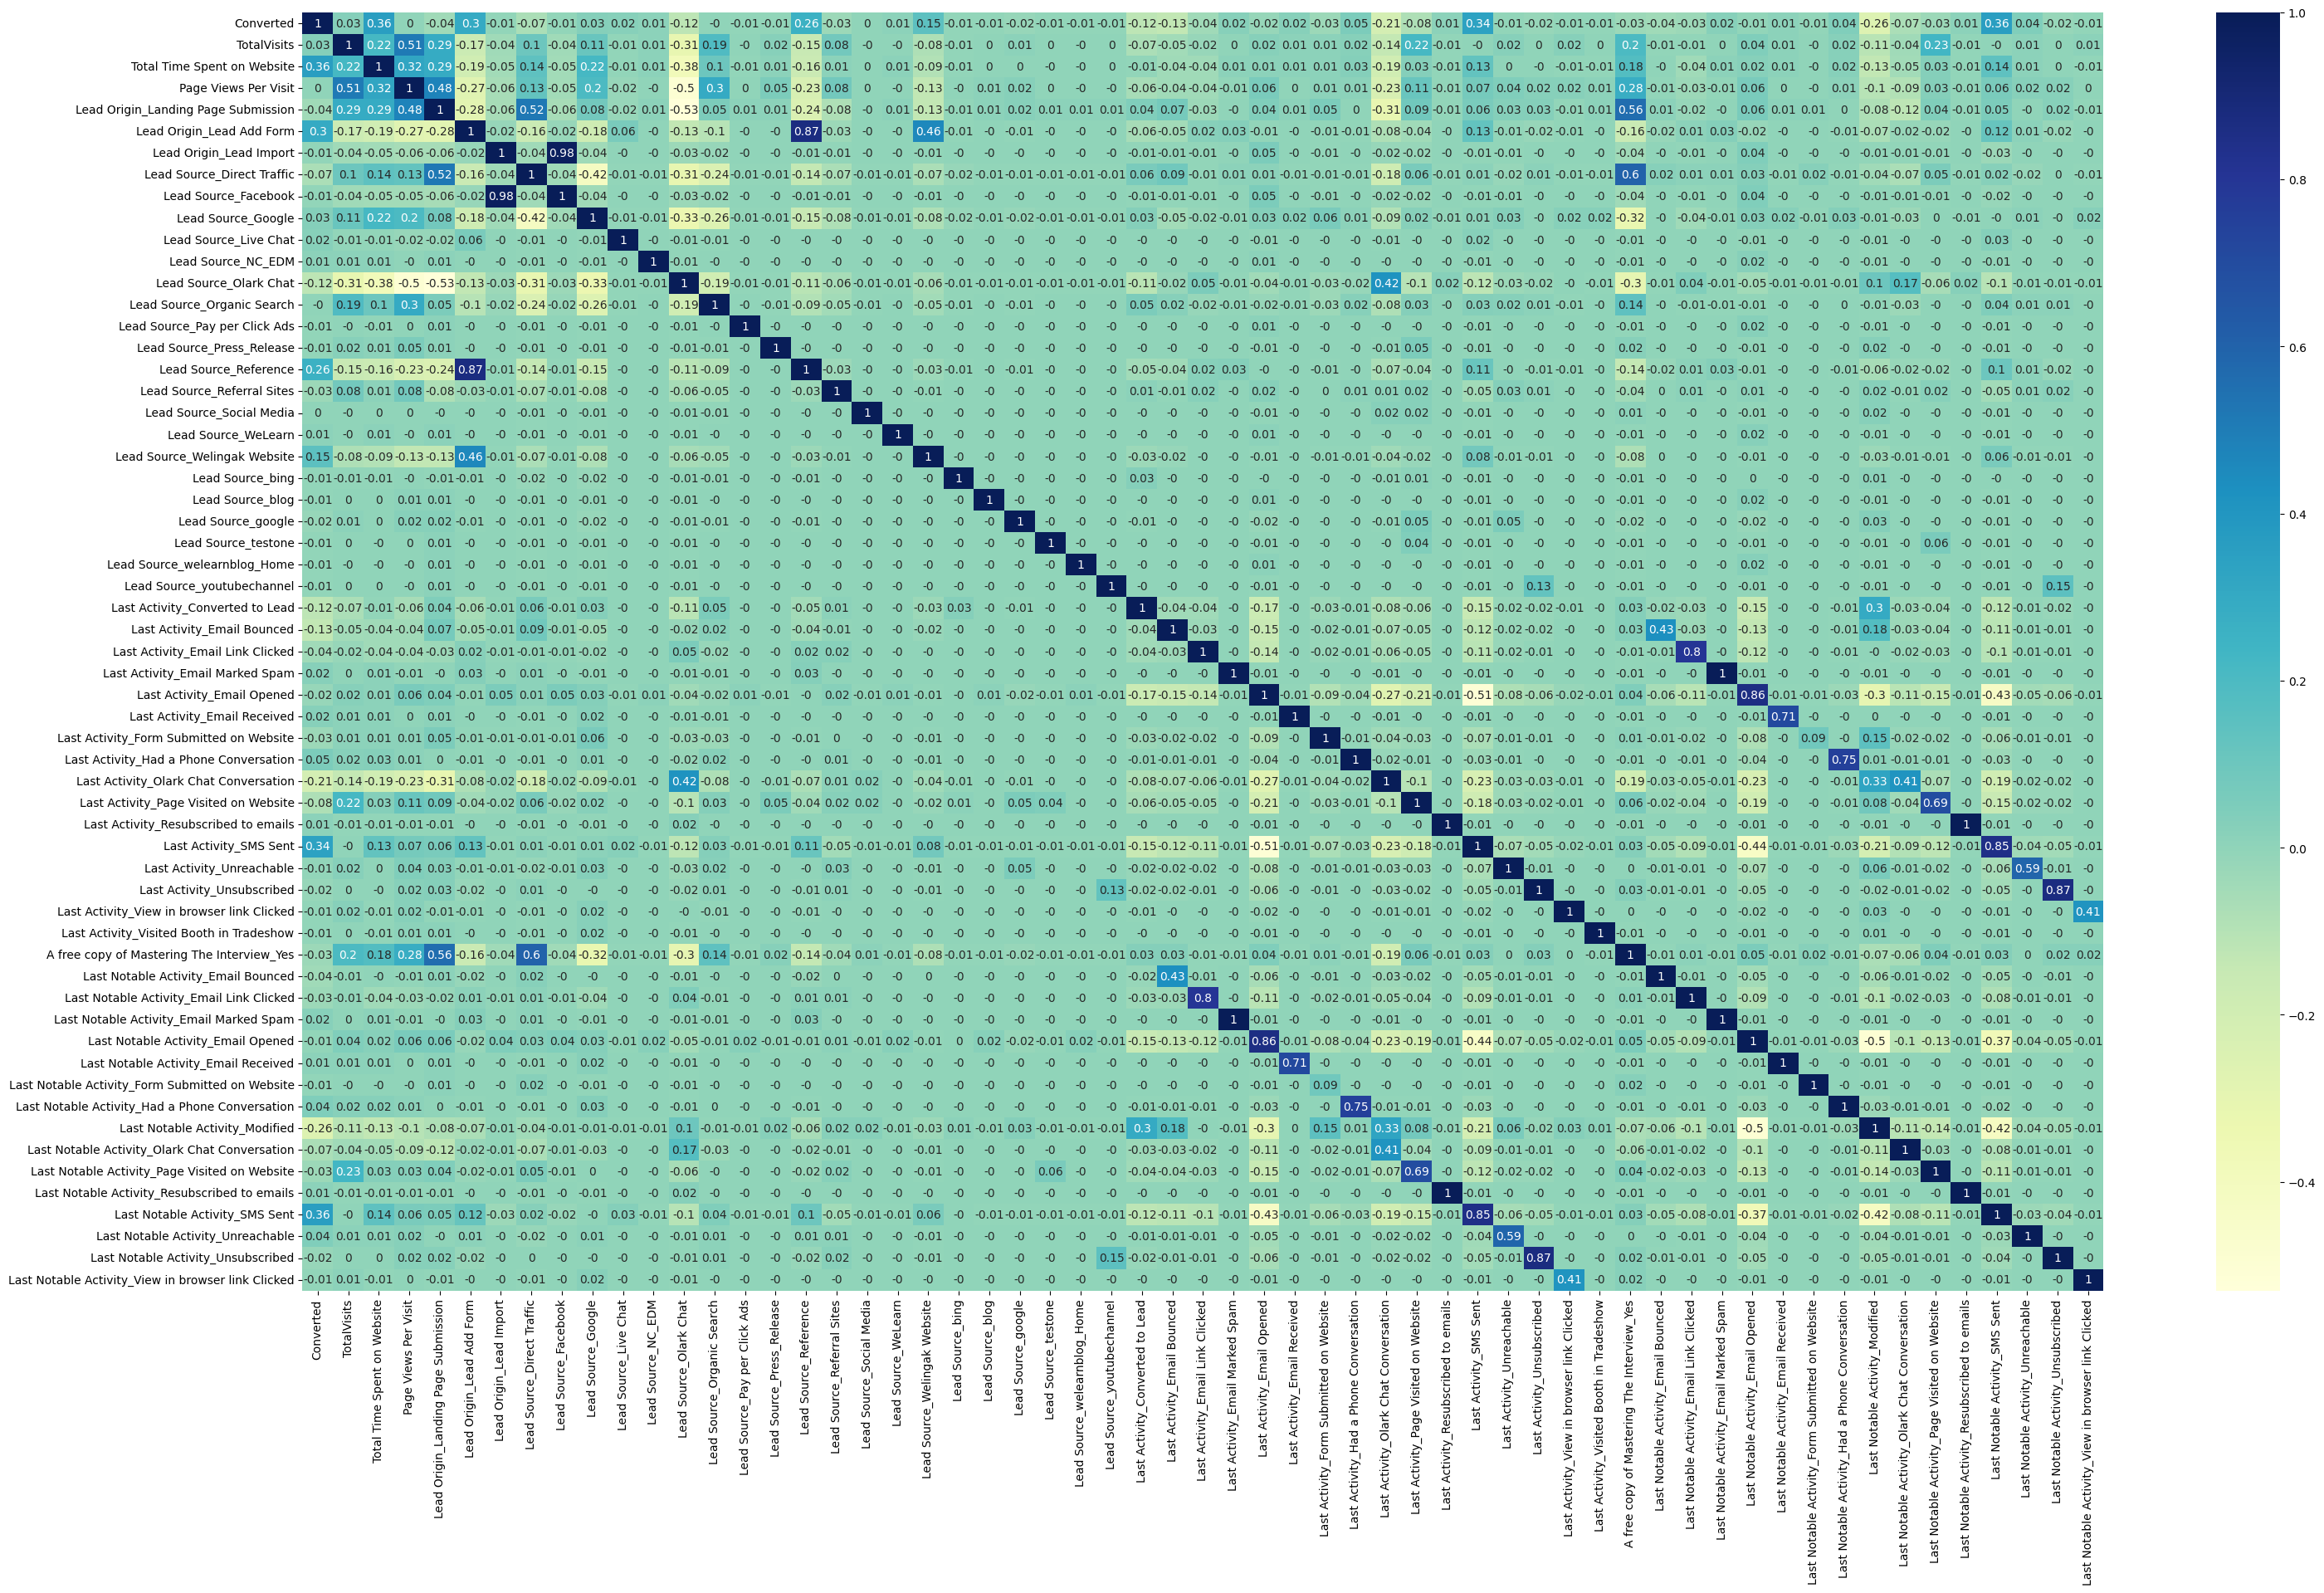

In [84]:
# Looking at the correlation table
plt.figure(figsize=(35,20))

# heatmap
sns.heatmap(round(master_leads.corr(),2), cmap="YlGnBu", annot=True)
plt.show()

# Test-Train Split
Lets split the dataset into training an testing sets.

In [85]:
#Now lets Put all the feature variables in X
X = master_leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
# Now lets Put the target variable in y
y = master_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   TotalVisits                                         6351 non-null   float64
 1   Total Time Spent on Website                         6351 non-null   int64  
 2   Page Views Per Visit                                6351 non-null   float64
 3   Lead Origin_Landing Page Submission                 6351 non-null   uint8  
 4   Lead Origin_Lead Add Form                           6351 non-null   uint8  
 5   Lead Origin_Lead Import                             6351 non-null   uint8  
 6   Lead Source_Direct Traffic                          6351 non-null   uint8  
 7   Lead Source_Facebook                                6351 non-null   uint8  
 8   Lead Source_Google                                  6351 non-null   uint8  

# Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's scale these variables.

In [89]:
#Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
